# 학생 성적 예측 하기

    1. 목표: 학생 성적 예측 모델 구현
    2. 결과: 예측값 확인
             학생의 성적에 영향을 미치는 주요 요인 식별
             예측 모델을 통해 학생들의 학업 성취도 향상을 위한 인사이트 제공

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("project_students_prediction").getOrCreate()

24/12/20 14:19:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# 데이터 가져오기


## 데이터 설명
    이 데이터는 두 개의 포르투갈 중등학교에서의 학생 성취도를 다루고 있습니다.  
    데이터 속성에는 학생의 성적, 인구통계학적 특성, 사회적 특성, 그리고 학교 관련 특성이 포함되어 있습니다.  

    1학기, 2학기, 최종 성적을 확인 할 수 있습니다.  
    
## 속성 설명
    # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
    1 school - 학교 (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    2 sex - 학생 성별 (binary: 'F' - female or 'M' - male)
    3 age - 학생 나이 (numeric: from 15 to 22)
    4 address - 학생의 거주지 (binary: 'U' - urban or 'R' - rural)
    5 famsize - 가족 구성원 (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    6 Pstatus - 부모 거주 여부 (binary: 'T' - living together or 'A' - apart)
    7 Medu - 모의 교육 수준 (numeric: 0 - none, 1 - primary education (4th grade), 2 -“ 5th to 9th grade, 3 -“ secondary education or 
                             4 -“ higher education)
    8 Fedu - 부 의 교육 수준 (numeric: 0 - none, 1 - primary education (4th grade), 2 -“ 5th to 9th grade, 3 -“ secondary education or 
                             4 -“ higher education)
    9 Mjob - 모 의 직업 (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    10 Fjob - 부 의 직업 (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or    
                           'other')
    11 reason - 학교 선택 이유 (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    12 guardian - 학생의 보호자 (nominal: 'mother', 'father' or 'other')
    13 traveltime - 등교 시간 (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14 studytime - 주간 공부 시간 (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15 failures - 과거 수업 실패 횟수 (numeric: n if 1<=n<3, else 4)
    16 schoolsup - 추가 수업 여부 (binary: yes or no)
    17 famsup - 가족의 교육적 지원 여부 (binary: yes or no)
    18 paid - 수학 또는 포르투갈어 과목에 대한 추가 유료 수업 여부 (binary: yes or no)
    19 activities - 추가 과외 여부 (binary: yes or no)
    20 nursery - 보육원 경험 여부 (binary: yes or no)
    21 higher - 고등교육 희망 여부 (binary: yes or no)
    22 internet - 가정에서 인터넷 사용 가능 여부 (binary: yes or no)
    23 romantic - 연애 여부 (binary: yes or no)
    24 famrel - 가족과의 관계 (numeric: from 1 - very bad to 5 - excellent)
    25 freetime - 방과 후 가족과 함께 보내는 빈도수 (numeric: from 1 - very low to 5 - very high)
    26 goout - 친구들과 보내는 빈도수 (numeric: from 1 - very low to 5 - very high)
    27 Dalc - 주간 알콜 소비수 (numeric: from 1 - very low to 5 - very high)
    28 Walc - 주말 알콜 소비수 (numeric: from 1 - very low to 5 - very high)
    29 health - 현재 건강 상태 (numeric: from 1 - very bad to 5 - very good)
    30 absences - 학교 결석 수 (numeric: from 0 to 93)

    #these grades are related with the course subject, Math or Portuguese:
    31 G1 - 1학기 성적 (numeric: from 0 to 20)
    31 G2 - 2학기 성적 (numeric: from 0 to 20)
    32 G3 - 최종 성적 (numeric: from 0 to 20, output target)

In [ ]:
# 각 데이터 읽기

In [2]:
mat_df = spark.read.csv('data/student-mat.csv', inferSchema=True, header=True, sep=';')

In [3]:
por_df = spark.read.csv('data/student-por.csv', inferSchema=True, header=True, sep=';')

In [ ]:
# 수직 결합

In [4]:
df_com = mat_df.union(por_df)

In [ ]:
# view

In [5]:
df_com.createOrReplaceTempView("df_com")

24/12/20 14:19:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [7]:
df_com.show(5)

+------+---+---+-------+-------+-------+----+----+-------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|   Mjob|    Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+-------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|   4|   4|at_home| teacher|course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6|  6|
|    GP|  F| 17|      U|    GT3|      T|

In [7]:
df_com.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [6]:
# 필요 속성 불러오기
from pyspark.sql.functions import col, count, when, isnan, mean, corr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 확인

In [11]:
def count_nulls(c):
    return count(when(col(c).isNull() | isnan(c), c)).alias(c)

null_counts = df_com.select([count_nulls(c) for c in df_com.columns])

null_counts.show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     0|       0|         0|        0|       0|        0|     0|   0|         0|      0|     0|       0|       0|     0|       0|    0|   0|   0|     0|       0|  0|  0|  0|
+------+---+---+-------+-------+-------+----+----+----+----+------+-

# 데이터 분석
    학생의 최종 성적이 여러가지 요인에 따라 영향을 받는지 분석.
    
    1. 컬럼 값 확인하기 - 컬럼 별 개수 확인
    2. 1학기, 2학기, 최종 성적 간 상관 관계
    3. "교육적인 지원 부분" 별 최종 성적 관계 - 추가 수업, 추가 과외, 가족의 교육 지원, 특정 과목 과외
    4. "부모 관련된 부분' 별 최종 성적 관계
    5. "그 외 요인'별 최종 성적 관계
    6. 결석, 주소지와 최종 성적 관계

## 1. 컬럼 값 확인하기

In [21]:
# 모든 컬럼에 대해 값의 개수 계산
for column in df_com.columns:
    print(f"Value counts for column: {column}")
    
    # 각 컬럼의 값 개수를 계산하고 정렬
    value_counts = df_com.groupBy(column).agg(count("*").alias("count")) \
                     .orderBy(col("count").desc())
    
    # 결과 출력
    value_counts.show(truncate=False)


Value counts for column: school


+------+-----+
|school|count|
+------+-----+
|GP    |772  |
|MS    |272  |
+------+-----+


Value counts for column: sex


+---+-----+
|sex|count|
+---+-----+
|F  |591  |
|M  |453  |
+---+-----+


Value counts for column: age


+---+-----+
|age|count|
+---+-----+
|16 |281  |
|17 |277  |
|18 |222  |
|15 |194  |
|19 |56   |
|20 |9    |
|21 |3    |
|22 |2    |
+---+-----+


Value counts for column: address


+-------+-----+
|address|count|
+-------+-----+
|U      |759  |
|R      |285  |
+-------+-----+


Value counts for column: famsize


+-------+-----+
|famsize|count|
+-------+-----+
|GT3    |738  |
|LE3    |306  |
+-------+-----+


Value counts for column: Pstatus


+-------+-----+
|Pstatus|count|
+-------+-----+
|T      |923  |
|A      |121  |
+-------+-----+


Value counts for column: Medu


+----+-----+
|Medu|count|
+----+-----+
|4   |306  |
|2   |289  |
|3   |238  |
|1   |202  |
|0   |9    |
+----+-----+


Value counts for column: Fedu


+----+-----+
|Fedu|count|
+----+-----+
|2   |324  |
|1   |256  |
|3   |231  |
|4   |224  |
|0   |9    |
+----+-----+


Value counts for column: Mjob


+--------+-----+
|Mjob    |count|
+--------+-----+
|other   |399  |
|services|239  |
|at_home |194  |
|teacher |130  |
|health  |82   |
+--------+-----+


Value counts for column: Fjob
+--------+-----+
|Fjob    |count|
+--------+-----+
|other   |584  |
|services|292  |
|teacher |65   |
|at_home |62   |
|health  |41   |
+--------+-----+


Value counts for column: reason
+----------+-----+
|reason    |count|
+----------+-----+
|course    |430  |
|home      |258  |
|reputation|248  |
|other     |108  |
+----------+-----+


Value counts for column: guardian


+--------+-----+
|guardian|count|
+--------+-----+
|mother  |728  |
|father  |243  |
|other   |73   |
+--------+-----+


Value counts for column: traveltime


+----------+-----+
|traveltime|count|
+----------+-----+
|1         |623  |
|2         |320  |
|3         |77   |
|4         |24   |
+----------+-----+


Value counts for column: studytime


+---------+-----+
|studytime|count|
+---------+-----+
|2        |503  |
|1        |317  |
|3        |162  |
|4        |62   |
+---------+-----+


Value counts for column: failures
+--------+-----+
|failures|count|
+--------+-----+
|0       |861  |
|1       |120  |
|2       |33   |
|3       |30   |
+--------+-----+


Value counts for column: schoolsup


+---------+-----+
|schoolsup|count|
+---------+-----+
|no       |925  |
|yes      |119  |
+---------+-----+


Value counts for column: famsup


+------+-----+
|famsup|count|
+------+-----+
|yes   |640  |
|no    |404  |
+------+-----+


Value counts for column: paid
+----+-----+
|paid|count|
+----+-----+
|no  |824  |
|yes |220  |
+----+-----+


Value counts for column: activities
+----------+-----+
|activities|count|
+----------+-----+
|no        |528  |
|yes       |516  |
+----------+-----+


Value counts for column: nursery
+-------+-----+
|nursery|count|
+-------+-----+
|yes    |835  |
|no     |209  |
+-------+-----+


Value counts for column: higher
+------+-----+
|higher|count|
+------+-----+
|yes   |955  |
|no    |89   |
+------+-----+


Value counts for column: internet


+--------+-----+
|internet|count|
+--------+-----+
|yes     |827  |
|no      |217  |
+--------+-----+


Value counts for column: romantic


+--------+-----+
|romantic|count|
+--------+-----+
|no      |673  |
|yes     |371  |
+--------+-----+


Value counts for column: famrel
+------+-----+
|famrel|count|
+------+-----+
|4     |512  |
|5     |286  |
|3     |169  |
|2     |47   |
|1     |30   |
+------+-----+


Value counts for column: freetime
+--------+-----+
|freetime|count|
+--------+-----+
|3       |408  |
|4       |293  |
|2       |171  |
|5       |108  |
|1       |64   |
+--------+-----+


Value counts for column: goout


+-----+-----+
|goout|count|
+-----+-----+
|3    |335  |
|2    |248  |
|4    |227  |
|5    |163  |
|1    |71   |
+-----+-----+


Value counts for column: Dalc


+----+-----+
|Dalc|count|
+----+-----+
|1   |727  |
|2   |196  |
|3   |69   |
|5   |26   |
|4   |26   |
+----+-----+


Value counts for column: Walc


+----+-----+
|Walc|count|
+----+-----+
|1   |398  |
|2   |235  |
|3   |200  |
|4   |138  |
|5   |73   |
+----+-----+


Value counts for column: health


+------+-----+
|health|count|
+------+-----+
|5     |395  |
|3     |215  |
|4     |174  |
|1     |137  |
|2     |123  |
+------+-----+


Value counts for column: absences


+--------+-----+
|absences|count|
+--------+-----+
|0       |359  |
|2       |175  |
|4       |146  |
|6       |80   |
|8       |64   |
|10      |38   |
|12      |24   |
|14      |20   |
|5       |17   |
|16      |17   |
|1       |15   |
|3       |15   |
|7       |10   |
|9       |10   |
|11      |8    |
|18      |8    |
|22      |5    |
|15      |5    |
|13      |4    |
|20      |4    |
+--------+-----+
only showing top 20 rows


Value counts for column: G1
+---+-----+
|G1 |count|
+---+-----+
|10 |146  |
|11 |130  |
|12 |117  |
|13 |105  |
|14 |101  |
|9  |96   |
|8  |83   |
|7  |70   |
|15 |59   |
|16 |44   |
|6  |33   |
|17 |24   |
|18 |15   |
|5  |12   |
|19 |4    |
|4  |3    |
|3  |1    |
|0  |1    |
+---+-----+


Value counts for column: G2
+---+-----+
|G2 |count|
+---+-----+
|11 |138  |
|10 |129  |
|12 |127  |
|9  |122  |
|13 |117  |
|14 |77   |
|8  |72   |
|15 |72   |
|16 |38   |
|7  |37   |
|18 |26   |
|17 |25   |
|6  |21   |
|0  |20   |
|5  |18   |
|19 |4    |
|4  |1    |
+--

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## 2. 1학기, 2학기, 최종 성적 간 관계
    G1: 1학기 성적
    G2: 2학기 성적
    G3: 최종 성적
    
    1학기 성적 부터 최종 성적 까지의 평균 점수는 11점대로, 중간 점수에 위치하고 있음.
    
    데이터의 포인트들이 대각선 방향으로 밀집되어 있어 강한 선형관계를 보여줌.
    특히 중간 범위(10-15점)에서 많은 데이터가 집중되어 있는 것으로 보아, 대부분의 학생들이 중간 점수 대를 받은 것으로 예측됨.
    최종 성적(G3) 부분에서 그래프 하단부에서 일부 특이점들이 있음. 이것은 과목 낙제 또는 성적 불일치로 생각됨.

In [113]:
# 평균 점수

grade_avg = df_com.select([mean(col(c)).alias(f"{c}_avg") for c in ['G1', 'G2', 'G3']])
grade_avg.show()

+-----------------+------------------+------------------+
|           G1_avg|            G2_avg|            G3_avg|
+-----------------+------------------+------------------+
|11.21360153256705|11.246168582375478|11.341954022988507|
+-----------------+------------------+------------------+



/tmp/ipykernel_2945/3326565905.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


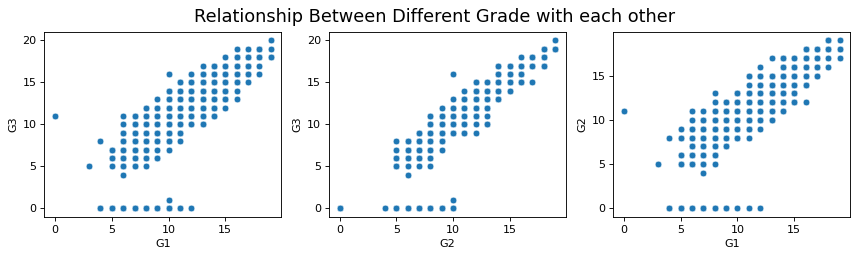

In [91]:
pandas_df = df_com.toPandas()

fig, ax =plt.subplots(1,3,figsize=(13,3), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(data=pandas_df, x="G1", y="G3",ax=ax[0])
sns.scatterplot(data=pandas_df, x="G2", y="G3",ax=ax[1])
sns.scatterplot(data=pandas_df, x="G1", y="G2",ax=ax[2])
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
fig.suptitle('Relationship Between Different Grade with each other', fontsize=16)
fig.show()

## 3. '교육적 지원' 과 최종 성적의 관계

### 추가 수업 - 최종 성적
    schoolsup: 추가 수업 여부 (yes or no)
    
    'yes'(지원 있음)와 'no'(지원 없음) 그룹 모두 중앙값이 약 11-12점 정도로 비슷한 수준을 보임.
     학교 지원 여부에 따른 중앙값의 차이는 크지 않고, 오히려 지원을 받지 않는 학생들의 성적 분포가 더 넓게 나타남.
     지원을 받는 학생들의 성적의 편차가 더 적으며, 지원을 받지 않는 학생들은 더 다양한 성적 분포를 나타냄.
    
### 추가 과외 - 최종 성적
    activites: 추가 과외 활동 (yes or no)
    
    추가 과외 참여("yes")와 미참여("no") 그룹 모두 중앙값이 약 11-12점 정도로 비슷한 수준을 보이며, 두 그룹의 박스 크기도 유사함.
    활동 참여 여부에 따른 최종 성적의 분포는 거의 차이가 없어 보임. 
    이는 해당 활동이 학생들의 최종 성적에 큰 영향을 미치지 않았을 수 있음.
    
### 가족의 교육적 지원 - 최종 성적
    famsup: 가족의 교육적 지원 (yes or no)
    
    박스의 크기와 형태가 매우 유사해, 가족 지원 여부에 따른 성적 분포의 차이가 크지 않아 보임.
    가족의 교육적 지원 여부가 학생들의 최종 성적에 큰 영향을 미치지 않는 것으로 해석됨.
    
### 수학, 포르투갈어 과외 - 최종 성적
    paid: 수학, 포르투갈어 추가 과외 (yes or no)
    
    두 그룹 간의 성적 분포는 매우 유사한 패턴을 보이며, 유료 수업 수강 여부가 최종 성적에 큰 영향을 미치지 않은 것으로 보임.
    오히려 유료 수업을 듣지 않은 학생들의 중앙값이 약간 더 높게 나타남.

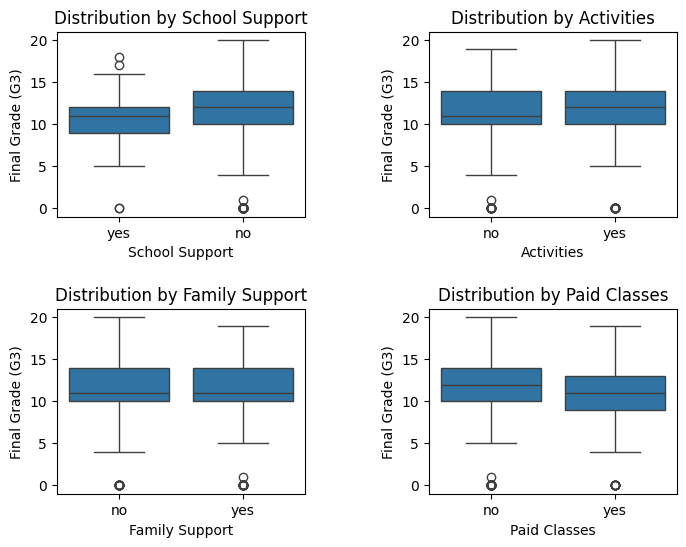

In [99]:
# 전체 그림의 크기 설정
plt.figure(figsize=(8, 6))

# 추가 수업 - 최종 성적
plt.subplot(2, 2, 1)
sns.boxplot(data=pandas_df, x="schoolsup", y="G3")
plt.title('Distribution by School Support')
plt.xlabel('School Support')
plt.ylabel('Final Grade (G3)')

# 추가 과외 - 최종 성적
plt.subplot(2, 2, 2)
sns.boxplot(data=pandas_df, x="activities", y="G3")
plt.title('Distribution by Activities')
plt.xlabel('Activities')
plt.ylabel('Final Grade (G3)')

# 가족의 교육적 지원 - 최종 성적
plt.subplot(2, 2, 3)
sns.boxplot(data=pandas_df, x="famsup", y="G3")
plt.title('Distribution by Family Support')
plt.xlabel('Family Support')
plt.ylabel('Final Grade (G3)')

# 수학,포르투갈어 과외 - 최종 성적
plt.subplot(2, 2, 4)
sns.boxplot(data=pandas_df, x="paid", y="G3")
plt.title('Distribution by Paid Classes')
plt.xlabel('Paid Classes')
plt.ylabel('Final Grade (G3)')

# 서브플롯 간 간격 조정
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 그래프 표시
plt.show()

## 4. '부모 관련' 과 최종 성적의 관계

### 부모 직업 - 최종 성적 
    Mjob & Fjob: 부모의 직업 (teacher, health, services-administrative or police, at_home, other)
    
    어머니의 직업이 건강 관련의 중앙값이 가장 높고, 성적 분포도 비교적 고름. 그 다음으로 기타 직군이 높은 중앙값을 나타냄.  
                    서비스 직군의 경우 성적 편차가 매우 크며 특이값도 나타남.  
    아버지의 직업이 교사 직군이 가장 높은 중앙값과 상위 성적 분포를 보임.  
                    다른 직군들은 차이가 없어 보임.  
    
    전반적으로 어머니의 직업에 따른 성적 차이가 아버지 직업에 따른 성적 차이보다 두드러지게 나타남.


### 부모 교육 수준 - 최종 성적
    Medu & Fedu: 부모의 교육 수준 (none, 4th, 5~9th, secondary,'higher)
    
    어머니의 교육 수준이 높아질 수록 학생들의 평균 성적이 점진적으로 상승하는 경향을 보임.
                   특히 'higher' 구간에 학생 성적 중앙값이 가장 높고, 성적 분포도 상대적으로 높은 구간에 집중되어 있음.
    아버지의 교육 수준이 높아질 수록 자녀의 성적이 전반적으로 향상 됨. 이는 어머니의 경우와 유사함.
                  'higher' 구간에 학생들의 성적 분포가 가장 높은 중앙값을 나타냄.
                  
    부모 모두 교육 수준이 높을수록 자녀의 학업 성취도가 높아지는 경향을 확인함.

/tmp/ipykernel_2945/121824364.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(('teacher', 'health', 'services', 'at_home', 'other'), rotation='vertical')
/tmp/ipykernel_2945/121824364.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(('teacher', 'health', 'services', 'at_home', 'other'), rotation='vertical')
/tmp/ipykernel_2945/121824364.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(('none', '4th', '5~9th', 'secondary', 'higher'), rotation='vertical')
/tmp/ipykernel_2945/121824364.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(('none', '4th', '5~9th', 'secondary', 'higher'), rotation='vertical')


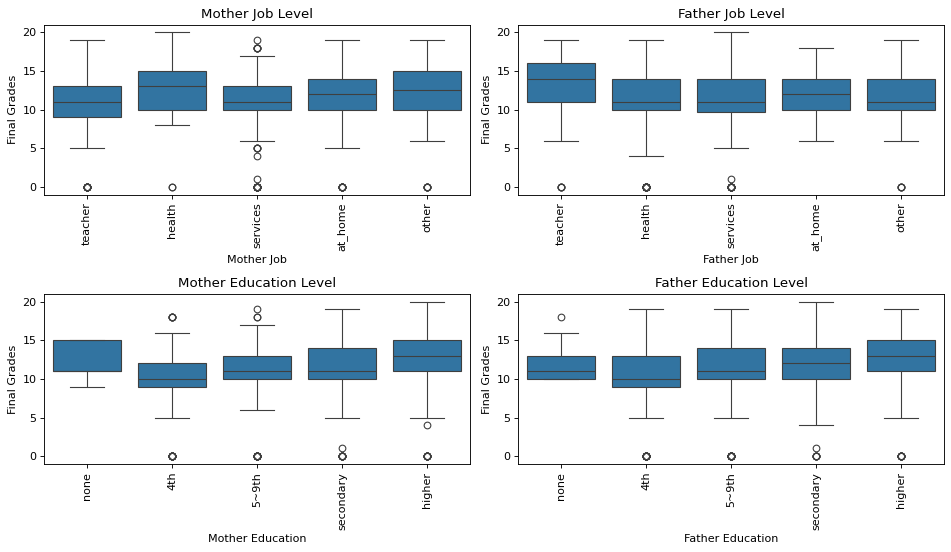

In [101]:
# 전체 그림의 크기 설정
fig, ax = plt.subplots(2, 2, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')

# 어머니 직업
sns.boxplot(data=pandas_df, x="Mjob", y="G3", ax=ax[0, 0]).set_title('Mother Job Level')
ax[0, 0].set_xticklabels(('teacher', 'health', 'services', 'at_home', 'other'), rotation='vertical')
ax[0, 0].set_xlabel('Mother Job')
ax[0, 0].set_ylabel('Final Grades')

# 아버지 직업
sns.boxplot(data=pandas_df, x="Fjob", y="G3", ax=ax[0, 1]).set_title('Father Job Level')
ax[0, 1].set_xticklabels(('teacher', 'health', 'services', 'at_home', 'other'), rotation='vertical')
ax[0, 1].set_xlabel('Father Job')
ax[0, 1].set_ylabel('Final Grades')

# 어머니 교육 수준
sns.boxplot(data=pandas_df, x="Medu", y="G3", ax=ax[1, 0]).set_title('Mother Education Level')
ax[1, 0].set_xticklabels(('none', '4th', '5~9th', 'secondary', 'higher'), rotation='vertical')
ax[1, 0].set_xlabel('Mother Education')
ax[1, 0].set_ylabel('Final Grades')

# 아버지 교육 수준
sns.boxplot(data=pandas_df, x="Fedu", y="G3", ax=ax[1, 1]).set_title('Father Education Level')
ax[1, 1].set_xticklabels(('none', '4th', '5~9th', 'secondary', 'higher'), rotation='vertical')
ax[1, 1].set_xlabel('Father Education')
ax[1, 1].set_ylabel('Final Grades')

plt.tight_layout()
plt.show()

## 5. '그 외 요인' 과 최종 성적의 관계
    studytime - 주간 공부 시간 (1: 2시간 이하, 2: 2~5시간, 3: 5~10시간, 4: 10 hours 이상)
    traveltime - 등교 시간 (1: 15분 이하, 2: 15~30분, 3: 30분~1시간, 4: 1 hour이상)
    health - 현재 건강 상태 (1:매우 나쁨, 2: 나쁨, 3: 보통, 4: 좋음. 5: 아주 좋음)
    failures - 과거 수업 실패 횟수 (0번, 1번, 2번, 4번)
    
    
    평균 주간 공부시간은 2~3시간 정도이며, 등교 시간은 평균 15분~20분으로 나타남.
    학생들의 평균 건강상태는 보통이고, 과거 수업에서 실패 했던 평균 횟수는 0~1번 임.
    
    
    주간 공부 시간이 2시간 이하인 경우, 0~13점 대의 점수를 가지고 있으며,
                     5시간 ~ 10시간 이상 공부한 학생들은 15~20점의 고득점을 받은 것으로 나타남.
    
    등교 시간의 경우, 1시간 이상 걸리는 학생들의 점수는 7점~14점.
                      15분 이하로 가까운 거리의 학생들은 15점~20점에 분포되어 있음.
    
    건강 상태가 보통인 경우 중간 점수 대인 10점~13점에 가장 많으나,
                가장 나쁜 학생들과 가장 좋은 학생들은 상위권인 14점~17점에서 나타남.
             
    과거 실패 경험이 없는 학생들은 중간 점수대에서 고득점 (10~20점)에 있고,
              경험이 한 번이라도 있는 학생들은 0점~10점에 가장 많이 나타남.

In [125]:
# 평균 계산

grade_avg2 = df_com.select([mean(col(c)).alias(f"{c}_avg") for c in ['studytime', 'traveltime', 'health', 'failures']])
grade_avg2.show()

+------------------+------------------+-----------------+-------------------+
|     studytime_avg|    traveltime_avg|       health_avg|       failures_avg|
+------------------+------------------+-----------------+-------------------+
|1.9703065134099618|1.5229885057471264|3.543103448275862|0.26436781609195403|
+------------------+------------------+-----------------+-------------------+



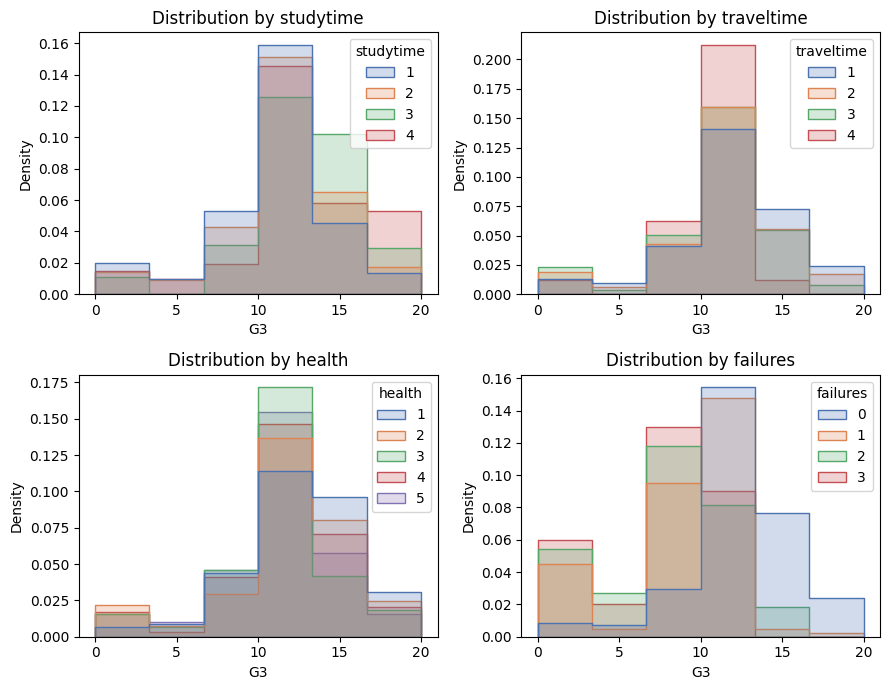

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# 공부 시간
sns.histplot(
    pandas_df, x="G3", hue="studytime", element="step",
    stat="density", common_norm=False, bins=6,
    palette="deep", ax=axes[0, 0]
)
axes[0, 0].set_title("Distribution by studytime")

# 이동 시간 
sns.histplot(
    pandas_df, x="G3", hue="traveltime", element="step",
    stat="density", common_norm=False, bins=6,
    palette="deep", ax=axes[0, 1]
)
axes[0, 1].set_title("Distribution by traveltime")

# 건강
sns.histplot(
    pandas_df, x="G3", hue="health", element="step",
    stat="density", common_norm=False, bins=6,
    palette="deep", ax=axes[1, 0]
)
axes[1, 0].set_title("Distribution by health")

# 수업 실패
sns.histplot(
    pandas_df, x="G3", hue="failures", element="step",
    stat="density", common_norm=False, bins=6,
    palette="deep", ax=axes[1, 1]
)
axes[1, 1].set_title("Distribution by failures")

plt.tight_layout()
plt.show()

## 6. 결석 수, 주소지와 최종 성적의 관계
    absences: 결석 수 (0번~93번)
    address: 주소지 (U - 도시 , R - 시골)
    
    평균 결석 수는 4일
    
    0~10일 결석은 대부분의 시골 거주 학생들이며, 20~60일의 결석을 한 학생들은 도시 학생들이 많이 분포되어 있음.
    60일 이상의 많은 결석을 한 학생들은 시골 거주만 나타남.
    
    최종 성적의 고득점(15~20점) 보유한 학생들은 도시, 시골 거주가 고르게 분포되어 있으나, 시골 거주가 더 많아 보임.
    고득점 학생들의 결석 수의 경우 도시 거주 학생들이 시골 거주 보다 많은 결석을 함.
    
    저득점(1~5점) 보유한 학생은 시골 학생들이 더 많은 것으로 나타남.
   

In [126]:
# 평균 계산

grade_avg3 = df_com.select([mean(col(c)).alias(f"{c}_avg") for c in ['absences', 'G3']])
grade_avg3.show()

+-----------------+------------------+
|     absences_avg|            G3_avg|
+-----------------+------------------+
|4.434865900383142|11.341954022988507|
+-----------------+------------------+



<Axes: xlabel='absences', ylabel='G3'>

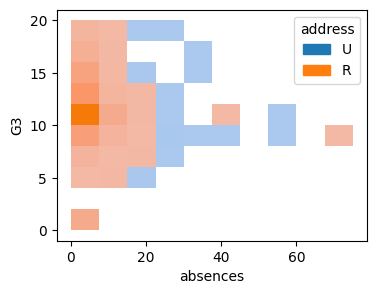

In [108]:
plt.figure(figsize=(4, 3))

sns.histplot(
    pandas_df,x="absences", y="G3", hue="address", legend=True,bins=10
)

# Regression Model

    학생의 최종 성적(G3)와 관련이 있어보이는 항목들만 추출 하여 회귀 모델 구현.
    
    features selection - 부모의 교육 수준 및 직업
                       - 주간 공부 시간 및 등교 시간
                       - 과거 실패 경험
                       - 결석 수
                       - 주소지와 추가 수업 
     

In [7]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# encoding

- Medu - 모 의 교육수준 ( 0 - none / 1 - primary education (4th grade) / 2 - 5~9th grade / 3  - secondary education / 4 - higher education)
- Fedu - 부 의 교육수준 ( 0 - none / 1 - primary education (4th grade) / 2 - 5~9th grade / 3  - secondary education / 4 - higher education)
- Mjob - 모 의 직업 (teacher - 0 / 'health'related - 1 / civil 'services' (e.g. administrative or police) - 2 /'at_home' - 4 / 'other' - 5)
- Fjob - 부 의 직업 (teacher - 0 / 'health'related - 1 / civil 'services' (e.g. administrative or police) - 2 /'at_home' - 4 / 'other' - 5)
- traveltime - 등교 시간 ( 15 min 미만 - 1 / 15 ~ 30 min - 2 / 30 min ~ 1 hour - 3 / 1 hour 이상 - 4)
- studytime - 주간 공부 시간 (2 hours 미만 - 1 / 2 ~ 5 hours - 2 / 5 ~ 10 hours - 3 / 10 hours 이상 - 4)
- failures - 과거 수업 실패 횟수 (0 ~ 4)
- schoolsup - 추가 교육 여부 (yes - 0 / no - 1)
- absences - 결석 수(0 ~ 93번)
- address - 주소지 (U - 도시 , R - 시골)
- G3 - 최종 성적 (0 ~ 20)

In [19]:
# 범주형 변수에 대한 StringIndexer 생성
categorical_cols = ["Mjob", "Fjob", "schoolsup", "address"]
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_cols]

In [20]:
# OneHotEncoder 생성
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in categorical_cols]

In [21]:
# 수치형 변수 선택
numeric_cols = ["Medu", "Fedu", "traveltime", "studytime", "failures", "absences"]

In [22]:
# 모든 특성을 하나의 벡터로 조합
assembler = VectorAssembler(
    inputCols=[col+"_vec" for col in categorical_cols] + numeric_cols,
    outputCol="features"
)

In [23]:
# 선형 회귀 모델 생성
lr = LinearRegression(featuresCol="features", labelCol="G3")

In [24]:
# 파이프라인 생성
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

In [25]:
# 데이터를 훈련셋과 테스트셋으로 분할
train_data, test_data = df_com.randomSplit([0.8, 0.2], seed=42)

In [26]:
# 모델 훈련
model = pipeline.fit(train_data)

24/12/20 14:32:43 WARN Instrumentation: [c8078efe] regParam is zero, which might cause numerical instability and overfitting.


In [27]:
# 테스트 데이터에 대한 예측
predictions = model.transform(test_data)

In [28]:
# 예측값 확인
predictions.select('G3','features','prediction').show(10, truncate=False)

+---+--------------------------------------------------------------------+------------------+
|G3 |features                                                            |prediction        |
+---+--------------------------------------------------------------------+------------------+
|13 |(16,[2,4,10,11,12,13,15],[1.0,1.0,2.0,2.0,1.0,1.0,8.0])             |9.03826931646011  |
|0  |(16,[1,6,8,10,11,12,13,14],[1.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0])       |9.940247292789099 |
|16 |(16,[0,4,8,10,11,12,13,15],[1.0,1.0,1.0,3.0,1.0,2.0,4.0,12.0])      |12.295252615108055|
|11 |(16,[0,5,8,9,10,11,12,13],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0])        |11.483168014948609|
|0  |(16,[5,8,9,10,11,12,13,14],[1.0,1.0,1.0,3.0,2.0,1.0,2.0,3.0])       |6.885621915296214 |
|18 |(16,[1,4,8,9,10,11,12,13,15],[1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,4.0]) |12.473568609417491|
|11 |(16,[3,5,8,9,10,11,12,13,15],[1.0,1.0,1.0,1.0,4.0,4.0,1.0,3.0,2.0]) |12.524829111153995|
|6  |(16,[1,4,8,9,10,11,12,13,15],[1.0,1.0,1.0,1.0,3.0,2.0,1

In [29]:
# evaluator

## 평가기 생성
evaluator_rmse = RegressionEvaluator(labelCol='G3', predictionCol='prediction', metricName='rmse') #r2

# 생성된 평가기에 함수 추가
rmse = evaluator_rmse.evaluate(predictions)
rmse

3.535268318666568

In [32]:
# 예측값 저장
predictions.select('G3', 'prediction').write.csv('data/output/grade_prediction.csv', header=True, mode='overwrite')

In [42]:
# 파이프라인 & 모델 저장

## 저장소 경로
model_save_path = 'data/output/grade_Ir_model'
pipeline_save_path = 'data/output/grade_pipeline_model'

model.write().overwrite().save(model_save_path)
pipeline.write().overwrite().save(pipeline_save_path)

print('saved')

saved


## 새로운 데이터로 예측
    1. 학생 최종 성적에 영향이 큰 '부모의 교육 수준'이 높다(higher education)고 가정할 경우의 학생 성적 예측
    2. '과거 실패 경험' 이 적다고 가정할 경우, 학생 성적 예측

In [43]:
## 파이프라인 & 모델 로드
from pyspark.ml import Pipeline
from pyspark.ml import PipelineModel

loaded_pipeline = Pipeline.load(pipeline_save_path)
loaded_model = PipelineModel.load(model_save_path)

In [44]:
loaded_pipeline, loaded_model

(Pipeline_2fe0958eadaf, PipelineModel_9d6645a0c8e0)

In [55]:
## 1번 예측 

### 아버지 교육 수준 가장 높은 '4'(higher education) 만 추출

fedu_data = df_com.filter('Fedu == 4').select("G3", "Mjob", "Fjob", "schoolsup", "address", 
                                              "Medu", "Fedu", "traveltime", "studytime", "failures", "absences")
fedu_data.show(3)

+---+-------+-------+---------+-------+----+----+----------+---------+--------+--------+
| G3|   Mjob|   Fjob|schoolsup|address|Medu|Fedu|traveltime|studytime|failures|absences|
+---+-------+-------+---------+-------+----+----+----------+---------+--------+--------+
|  6|at_home|teacher|      yes|      U|   4|   4|         2|        2|       0|       6|
|  6|  other|teacher|      yes|      U|   4|   4|         2|        2|       0|       6|
| 15|  other|  other|       no|      U|   3|   4|         1|        2|       0|       0|
+---+-------+-------+---------+-------+----+----+----------+---------+--------+--------+
only showing top 3 rows



In [66]:
### 저장된 파이프라인 모델 적용
predictions2 = loaded_model.transform(fedu_data)

In [58]:
predictions2.select("G3", "features", "prediction").show(5)

+---+--------------------+------------------+
| G3|            features|        prediction|
+---+--------------------+------------------+
|  6|(16,[2,6,9,10,11,...|12.269795667828017|
|  6|(16,[0,6,9,10,11,...|12.606167652547148|
| 15|(16,[0,4,8,9,10,1...|12.211207037183124|
|  9|(16,[3,8,9,10,11,...|12.558758826616563|
| 14|(16,[5,8,9,10,11,...| 12.81136006962426|
+---+--------------------+------------------+
only showing top 5 rows



In [61]:
### prediction의 평균 값 
from pyspark.sql import functions as F

fedu_pre_avg = predictions2.agg(F.avg('prediction'))
fedu_pre_avg.show()

+-----------------+
|  avg(prediction)|
+-----------------+
|12.34227798840152|
+-----------------+



In [63]:
## 2번 예측

### 과거 실패 경험 적은 것만 추출

failures_data = df_com.filter('failures == 0').select("G3", "Mjob", "Fjob", "schoolsup", "address", 
                                              "Medu", "Fedu", "traveltime", "studytime", "failures", "absences")

### 저장된 파이프라인 모델 적용
predictions3 = loaded_model.transform(failures_data)

predictions3.select("G3", "features", "prediction").show(5)

+---+--------------------+------------------+
| G3|            features|        prediction|
+---+--------------------+------------------+
|  6|(16,[2,6,9,10,11,...|12.269795667828017|
|  6|(16,[2,4,8,9,10,1...|11.410554227856215|
| 15|(16,[5,8,9,10,11,...| 13.76104337897582|
| 10|(16,[0,4,8,9,10,1...|12.182044052172644|
| 15|(16,[1,4,8,9,10,1...|  12.8878203208587|
+---+--------------------+------------------+
only showing top 5 rows



In [64]:
### prediction의 평균 값 
failures_pre_avg = predictions3.agg(F.avg('prediction'))
failures_pre_avg.show()

+-----------------+
|  avg(prediction)|
+-----------------+
|11.97802656109692|
+-----------------+



# 활용 방안 및 인사이트 도출

## 활용 방안
1.1 학생 성적 예측  
    목적: 학생의 과거 학업 기록 및 환경적 요인을 기반으로 최종 성적(G3)을 예측.  
    활용: 교사는 학생의 성적 향상을 위한 맞춤형 학습 계획을 세울 수 있습니다.  
          학습 부진 학생을 조기에 식별하여 추가 지원 제공 가능.  
          부모와의 상담 시 객관적인 데이터 기반으로 논의 가능.  

1.2 교육 정책 개선  
    목적: 학업 성취도에 영향을 미치는 주요 요인을 파악하여 정책 개선.  
    활용: 학업 시간(studytime)과 부모의 교육 수준(Medu, Fedu)이 성적에 긍정적인 영향을 미침을 확인.  
          학교 외 활동(goout) 및 알코올 소비(Dalc, Walc)을 관리 가능.  
          이를 바탕으로 학생들의 학습 환경 개선 및 건강한 생활 습관 장려.  

1.3 출결 관리  
결석(absences)이 성적에 약한 상관관계를 보이므로, 결석률 관리 정책 강화 가능.

## 데이터 분석 인사이트

2.1 주요 요인 분석  
    긍정적 영향:  
    부모의 교육 수준(Medu, Fedu): 부모의 높은 교육 수준은 학생의 높은 성취도와 관련.  
    학습 시간(studytime): 학습 시간이 많을수록 성적이 높아지는 경향.  
    부정적 영향:  
    실패 경험(failures): 실패 횟수가 많을수록 성적이 낮아짐.  
    외출 빈도(goout): 외출 빈도가 높을수록 성적이 낮아지는 경향.  
    주말 알코올 소비(Walc): 높은 알코올 소비는 낮은 성적과 연관.  
    
2.2 성적 분포  
대부분의 학생들이 중간 점수(8 ~ 14점)에 분포하며, 일부 학생은 높은 점수(15점 이상)를 기록.  
낮은 점수(0 ~ 5점) 구간에 속하는 학생들도 존재하며, 이들에 대한 추가 지원 필요.  

2.3 상관 관계  
시험 점수(G1, G2)는 최종 점수(G3)와 상관관계를 보임.  
이는 이전 시험 점수가 최종 성적을 예측하는 데 중요한 변수임을 나타냄.  

3. 회귀 모델 결과 활용  
회귀 모델을 통해 최종 점수를 예측함으로써, 학생 개개인의 학업 상태를 사전에 평가 가능.  
예측 결과를 기반으로 특정 그룹(예: 실패 횟수가 많은 학생)에 대해 추가 지원 제공 가능.  
심리 상태, 교우 관계, 학교 시설 만족도 등 추가 요인 고려하여 예측 가능.  

In [67]:
spark.stop()